In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
SE= pd.read_csv("C:/Users/ADMIN/Desktop/NSE_SCOM_Safaricom.csv")
SE
pd.DataFrame(SE)

,Date,Open,High,Low,Close,Vol.,Change %
0,11-06-2012,3.40,3.45,3.35,3.40,3.24M,0.00%
1,12-06-2012,3.40,3.50,3.40,3.45,6.09M,1.47%
2,13-06-2012,3.45,3.45,3.35,3.40,7.29M,-1.45%
3,14-06-2012,3.40,3.45,3.35,3.40,31.81M,0.00%
4,15-06-2012,3.40,3.50,3.40,3.40,7.57M,0.00%
...,...,...,...,...,...,...,...
1748,10-06-2019,27.10,27.60,27.05,27.45,1.33M,0.18%
1749,11-06-2019,27.50,27.70,27.20,27.55,1.71M,0.36%
1750,12-06-2019,27.60,27.65,27.30,27.50,22.67M,-0.18%
1751,13-06-2019,27.50,27.70,27.10,27.35,22.56M,-0.55%


In [3]:
SE['Vol.']=SE['Vol.'].str.replace('M',' ')

In [4]:
SE['Vol.'] = SE['Vol.'].str.replace('K',' ')

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [6]:
SE_encoded=SE.apply(LabelEncoder().fit_transform)
SE_encoded

,Date,Open,High,Low,Close,Vol.,Change %
0,592,1,0,0,0,664,239
1,653,1,1,1,1,958,359
2,709,2,0,0,0,1062,111
3,769,1,0,0,0,736,239
4,832,1,1,1,0,1079,239
...,...,...,...,...,...,...,...
1748,536,348,338,353,360,17,240
1749,597,353,340,355,362,42,255
1750,659,354,339,357,361,553,1
1751,715,353,340,354,358,548,31


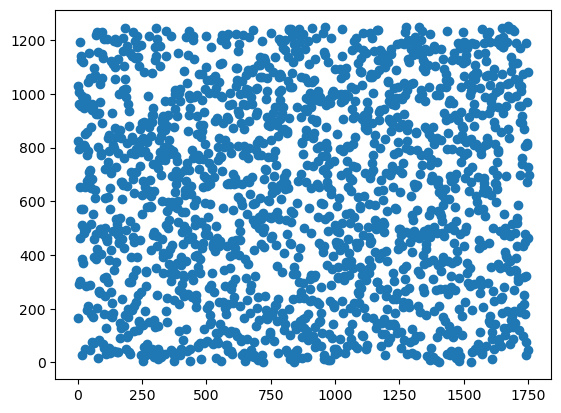

In [7]:
plt.scatter(x=SE_encoded['Date'],y=SE_encoded['Vol.'])
plt.show()

####There is no positive linear correlation between date and volume.

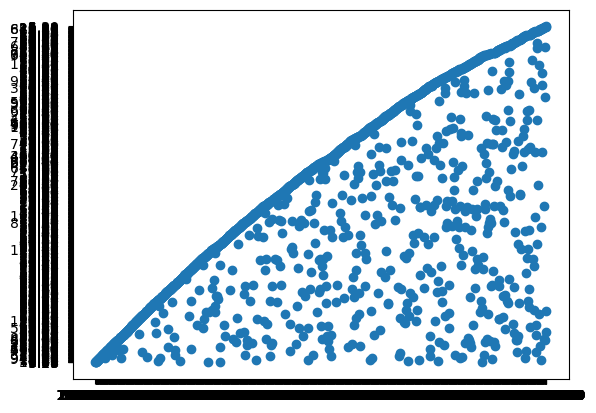

In [8]:
plt.scatter(x=SE['Date'],y=SE['Vol.'])
plt.show()

In [9]:
print(SE.corr())

           Open      High       Low     Close
Open   1.000000  0.998162  0.997978  0.997994
High   0.998162  1.000000  0.999272  0.999653
Low    0.997978  0.999272  1.000000  0.999697
Close  0.997994  0.999653  0.999697  1.000000


In [10]:
print(SE_encoded.corr())

              Date      Open      High       Low     Close      Vol.  Change %
Date      1.000000 -0.004600 -0.004786 -0.002425 -0.004079  0.034607 -0.027724
Open     -0.004600  1.000000  0.998266  0.997944  0.997925  0.039149 -0.091015
High     -0.004786  0.998266  1.000000  0.998713  0.998989  0.039220 -0.074358
Low      -0.002425  0.997944  0.998713  1.000000  0.999582  0.038417 -0.077611
Close    -0.004079  0.997925  0.998989  0.999582  1.000000  0.038297 -0.070250
Vol.      0.034607  0.039149  0.039220  0.038417  0.038297  1.000000 -0.009312
Change % -0.027724 -0.091015 -0.074358 -0.077611 -0.070250 -0.009312  1.000000


In [11]:
print(SE.tail())

            Date  Open   High    Low  Close    Vol. Change %
1748  10-06-2019  27.1  27.60  27.05  27.45   1.33     0.18%
1749  11-06-2019  27.5  27.70  27.20  27.55   1.71     0.36%
1750  12-06-2019  27.6  27.65  27.30  27.50  22.67    -0.18%
1751  13-06-2019  27.5  27.70  27.10  27.35  22.56    -0.55%
1752  14-06-2019  27.5  27.50  27.05  27.20   5.30    -0.55%


In [12]:
y=SE['Vol.'].values.reshape(-1,1)
y

array([['3.24 '],
       ['6.09 '],
       ['7.29 '],
       ...,
       ['22.67 '],
       ['22.56 '],
       ['5.30 ']], dtype=object)

In [13]:
cols=['Open','High','Low','Close']
le = LabelEncoder(); 
SE[cols]=SE[cols].apply(le.fit_transform)
print(SE)

            Date  Open  High  Low  Close    Vol. Change %
0     11-06-2012     1     0    0      0   3.24     0.00%
1     12-06-2012     1     1    1      1   6.09     1.47%
2     13-06-2012     2     0    0      0   7.29    -1.45%
3     14-06-2012     1     0    0      0  31.81     0.00%
4     15-06-2012     1     1    1      0   7.57     0.00%
...          ...   ...   ...  ...    ...     ...      ...
1748  10-06-2019   348   338  353    360   1.33     0.18%
1749  11-06-2019   353   340  355    362   1.71     0.36%
1750  12-06-2019   354   339  357    361  22.67    -0.18%
1751  13-06-2019   353   340  354    358  22.56    -0.55%
1752  14-06-2019   353   337  353    355   5.30    -0.55%

[1753 rows x 7 columns]


In [14]:
Variables=SE[['Open','High','Low','Close']]
Variables
x=Variables


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=0)

In [17]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [18]:
print(X_train)

      Open  High  Low  Close
1587   312   309  308    320
1050   296   287  294    296
733    225   221  222    225
1604   314   305  316    316
740    207   199  195    199
...    ...   ...  ...    ...
835    190   184  186    189
1216   284   275  273    275
1653   318   301  314    317
559    166   161  162    160
684    210   203  206    209

[1402 rows x 4 columns]


In [19]:
print(y_train)

[['13.37 ']
 ['8.69 ']
 ['7.84 ']
 ...
 ['3.85 ']
 ['6.15 ']
 ['3.84 ']]


In [20]:
print( X_test)

      Open  High  Low  Close
1161   261   255  257    260
666    187   188  185    191
412    126   125  128    124
558    163   162  163    163
784    203   196  197    199
...    ...   ...  ...    ...
1424   373   360  375    385
554    154   150  154    151
1042   281   280  281    287
1611   321   309  320    320
539    157   152  150    154

[351 rows x 4 columns]


In [21]:
print(y_test)

[['9.78 ']
 ['13.76 ']
 ['6.65 ']
 ['12.30 ']
 ['16.52 ']
 ['10.46 ']
 ['5.93 ']
 ['5.75 ']
 ['3.38 ']
 ['6.12 ']
 ['3.32 ']
 ['7.46 ']
 ['19.30 ']
 ['15.91 ']
 ['5.79 ']
 ['8.28 ']
 ['4.29 ']
 ['11.30 ']
 ['18.41 ']
 ['40.44 ']
 ['2.73 ']
 ['21.73 ']
 ['17.70 ']
 ['21.76 ']
 ['14.17 ']
 ['16.06 ']
 ['8.73 ']
 ['4.40 ']
 ['21.02 ']
 ['9.19 ']
 ['491.40 ']
 ['19.79 ']
 ['23.81 ']
 ['17.11 ']
 ['4.04 ']
 ['23.20 ']
 ['12.18 ']
 ['6.92 ']
 ['17.52 ']
 ['4.05 ']
 ['17.98 ']
 ['4.95 ']
 ['6.25 ']
 ['11.23 ']
 ['5.49 ']
 ['11.75 ']
 ['28.09 ']
 ['2.72 ']
 ['2.99 ']
 ['13.02 ']
 ['7.49 ']
 ['4.58 ']
 ['22.91 ']
 ['2.17 ']
 ['15.65 ']
 ['2.14 ']
 ['30.74 ']
 ['9.22 ']
 ['7.53 ']
 ['8.63 ']
 ['19.31 ']
 ['20.43 ']
 ['12.28 ']
 ['14.64 ']
 ['4.05 ']
 ['42.03 ']
 ['1.59 ']
 ['4.54 ']
 ['1.18 ']
 ['5.53 ']
 ['2.44 ']
 ['1.30 ']
 ['14.71 ']
 ['49.67 ']
 ['2.56 ']
 ['440.40 ']
 ['23.77 ']
 ['6.27 ']
 ['11.88 ']
 ['14.22 ']
 ['4.51 ']
 ['16.94 ']
 ['4.88 ']
 ['4.78 ']
 ['2.14 ']
 ['22.01 ']
 ['15.77 

In [ ]:
######Intercept

In [22]:
print(regressor.intercept_)

[31.95581789]


In [ ]:
#####retrieving the slope (which is also the coefficient of x)

In [23]:
print(regressor.coef_)

[[-1.15380619  0.54295052  0.93214738 -0.31748978]]


In [ ]:
#####Make Predictions

In [24]:
y_pred = regressor.predict(X_test)

In [25]:
y_pred

array([[26.27931804],
       [30.0754749 ],
       [34.39118452],
       [32.0325815 ],
       [24.60403033],
       [24.29540621],
       [33.29170075],
       [24.26585434],
       [26.76032811],
       [22.08194445],
       [33.84214142],
       [32.3970947 ],
       [21.67108685],
       [33.34861595],
       [33.52808932],
       [33.17498191],
       [20.94738085],
       [21.62300435],
       [34.72159136],
       [32.46287449],
       [21.38980469],
       [19.40210404],
       [30.80581363],
       [29.90539673],
       [26.32057947],
       [27.32058147],
       [24.62597835],
       [34.28076333],
       [36.66405001],
       [30.14094819],
       [26.18885458],
       [31.47811316],
       [22.54215014],
       [17.96723152],
       [30.17958154],
       [27.46673128],
       [30.26001201],
       [23.06315264],
       [30.79804107],
       [27.75466919],
       [35.62625449],
       [25.22900334],
       [22.12801636],
       [31.53167415],
       [28.16376946],
       [14

In [31]:
Predicted=pd.DataFrame(y_pred)
Predicted


,0
0,26.279318
1,30.075475
2,34.391185
3,32.032582
4,24.604030
...,...
346,24.369997
347,31.321982
348,30.576270
349,26.046173


In [34]:
SE_predicted=pd.concat([SE,Predicted])
SE_predicted

,Date,Open,High,Low,Close,Vol.,Change %,0
0,11-06-2012,1.0,0.0,0.0,0.0,3.24,0.00%,NaN
1,12-06-2012,1.0,1.0,1.0,1.0,6.09,1.47%,NaN
2,13-06-2012,2.0,0.0,0.0,0.0,7.29,-1.45%,NaN
3,14-06-2012,1.0,0.0,0.0,0.0,31.81,0.00%,NaN
4,15-06-2012,1.0,1.0,1.0,0.0,7.57,0.00%,NaN
...,...,...,...,...,...,...,...,...
346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.369997
347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.321982
348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.576270
349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.046173


In [35]:
SE_predicted.tail()

,Date,Open,High,Low,Close,Vol.,Change %,0
346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.369997
347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.321982
348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.576270
349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.046173
350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.265406
